# Assignment 2: Part B (70 marks)

Assignment 2 uses data collected by the U.S. Census Bureau’s **American Community Survey** (ACS).  ACS datasets and documentation for this assignment are provided in the `data` folder.

> *Have you ever thought about how, or why, new roads, schools, after-school programs, or hospitals are placed in communities?  Why there is an ATM or bike-share kiosk on a specific street corner? <br>
The answers often lie in the numbers — numbers that reflect what our communities look like, how our communities have changed, and how those changes impact our daily lives.
<br/><br/>The U.S. Census Bureau’s American Community Survey (ACS) is designed to answer these types of questions and to meet the needs of policymakers, business leaders, planners, and others nationwide who need good
data to make informed decisions*. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

### B1.1 Load health insurance data (5 marks)
The Health Insurance Coverage for all five boroughs was extracted from the ACS economic dataset and loaded into the excel spreadsheet:  `health-insurance.xlsx` 

For the `b1_load()` function below: 
- Load the Health Insurance Coverage excel spreadsheet `health-insurance.xlsx` into a DataFrame.
  - Your DataFrame's row and column indexes should match those in the excel spreadsheet.
  - You will need to convert data values from strings into integers.
- The code cell provided below function b1_load() - shown below - should return the value `8557254`.
  - Which is the `Civilian noninstitutionalized population` of New York City.

`b11 = b11_load()
 b11['New York City','Estimate'][0]`
 
 

In [2]:
def b11_load():
    # Your Code with appropriate comments here
    
    # Load the data using pd.read_excel, and erase headers and the first two rows
    df = pd.read_excel('a2data/health-insurance.xlsx', header=None, skiprows=2)
    
    # Add new two rows using pd.MultiIndex.from_tuples
    # This is quite time consuming, however, it gives more flexibility to put in necessary column names
    # There are other ways in adding column names which is shown in b12 and b21
    column_names = pd.MultiIndex.from_tuples([('Borough', 'Type'),
        ('New York City', 'Estimate'),
        ('New York City', 'Margin of Error'),
        ('New York City', 'Percent'),
        ('New York City', 'Percent Margin of Error'),
        ('Bronx', 'Estimate'),
        ('Bronx', 'Margin of Error'),
        ('Bronx', 'Percent'),
        ('Bronx', 'Percent Margin of Error'),
        ('Brooklyn', 'Estimate'),
        ('Brooklyn', 'Margin of Error'),
        ('Brooklyn', 'Percent'),
        ('Brooklyn', 'Percent Margin of Error'),
        ('Manhattan', 'Estimate'),
        ('Manhattan', 'Margin of Error'),
        ('Manhattan', 'Percent'),
        ('Manhattan', 'Percent Margin of Error'),
        ('Queens', 'Estimate'),
        ('Queens', 'Margin of Error'),
        ('Queens', 'Percent'),
        ('Queens', 'Percent Margin of Error'),
        ('Staten Island', 'Estimate'),
        ('Staten Island', 'Margin of Error'),
        ('Staten Island', 'Percent'),
        ('Staten Island', 'Percent Margin of Error')])
    
    # Convert the 'Estimate' columns for all Boroughs into integers, using for loop
    df.columns = column_names
    for column_name in df.columns:
        if 'Estimate' in column_name:
            df[column_name] = df[column_name].str.replace(',', '').astype(int)
    return df
    pass

In [3]:
b11 = b11_load()
b11['New York City','Estimate'][0]

8557254

In [ ]:
#help(pd.read_excel)

In [4]:
b11.head()

Borough New York City                  \
                                           Type      Estimate Margin of Error   
0      Civilian noninstitutionalized population       8557254        +/-4,124   
1                With health insurance coverage       7942126       +/-21,527   
2                 With private health insurance       4995085       +/-43,494   
3                          With public coverage       3736190       +/-39,689   
4                  No health insurance coverage        615128       +/-20,607   

                                        Bronx                             \
     Percent Percent Margin of Error Estimate Margin of Error    Percent   
0  8,557,254                     (X)  1449818        +/-2,803  1,449,818   
1      92.8%                  +/-0.2  1330519        +/-9,422      91.8%   
2      58.4%                  +/-0.5   670068       +/-19,104      46.2%   
3      43.7%                  +/-0.5   830048       +/-19,570      57.3%   
4       7.2%                  +/-0.2   119299        +/-8,803       8.2%   

                          Brooklyn  ...  Manhattan                          \
  Percent Margin of Error Estimate  ...    Percent Percent Margin of Error   
0                     (X)  2634931  ...  1,653,585                     (X)   
1                  +/-0.6  2452085  ...      95.0%                  +/-0.5   
2                  +/-1.3  1469510  ...      68.4%                  +/-1.1   
3                  +/-1.3  1200734  ...      35.0%                  +/-1.1   
4                  +/-0.6   182846  ...       5.0%                  +/-0.5   

    Queens                                                    Staten Island  \
  Estimate Margin of Error    Percent Percent Margin of Error      Estimate   
0  2343840        +/-1,851  2,343,840                     (X)        475080   
1  2131973       +/-12,566      91.0%                  +/-0.5        457317   
2  1383845       +/-18,906      59.0%                  +/-0.8        340013   
3   963522       +/-17,763      41.1%                  +/-0.8        163135   
4   211867       +/-12,249       9.0%                  +/-0.5         17763   

                                                    
  Margin of Error  Percent Percent Margin of Error  
0        +/-1,214  475,080                     (X)  
1        +/-3,466    96.3%                  +/-0.7  
2        +/-8,294    71.6%                  +/-1.7  
3        +/-7,598    34.3%                  +/-1.6  
4        +/-3,212     3.7%                  +/-0.7  

[5 rows x 25 columns]

### B1.2 Loading resident age categories (5 marks)
The breakdown of resident age into categories (Under 5 years, 5 to 9 years, etc.) for the residents of the five boroughs was extracted from the ACS demographic dataset and loaded into the excel spreadsheet:  `demographics.xlsx` 

For the `b12_load()` function below: 
- Load the resident's age data from the excel spreadsheet `demographics.xlsx` into a DataFrame.
- Your DataFrame's row and column indexes should match those in the excel spreadsheet.
- The code cell provided below function b7_load() - shown below - should return the value `40.4`.
  - Which is the the Median age in (years) for Staten Island residents.

`b12 = b12_load()
 b12['Staten Island','Estimate'][-1]`

In [5]:
def b12_load():
    # Your Code with appropriate comments here
    
    # Load the file using pd.read_excel, this time removing headers and skipping the first two rows, THEN select only wanted columns
    # This is done so that only the values of the data are retained, and then new column+row indexes are introduced
    data = pd.read_excel('a2data/demographics.xlsx', header=None, skiprows=2, usecols=range(1,25))
    
    # Set new row and column indexes as follows
    index_names1 = ['Under 5 years', '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 to 84 years', '85 years and over', 'Median age (years)']
    
    # Using MultiIndex.from_product to quickly build multi-dimensional column indexes
    column_names1 = pd.MultiIndex.from_product([['New York City', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],['Estimate', 'Margin of Error', 'Percent', 'Percent Margin of Error']],
                                              names=['Borough','Type'])
    
    # Load the data (only values), and set rows and columns
    df1 = pd.DataFrame(data.values, index=index_names1, columns=column_names1)
    
    # Convert the 'Estimate' columns for all Boroughs into float, using for loop
    # This is converted through to float as the median value in the column is not an integer
    for column_name2 in df1.columns:
        if 'Estimate' in column_name2:
            df1[column_name2] = df1[column_name2].str.replace(',', '').astype(float)
    
    return df1
    pass

In [6]:
b12 = b12_load()
b12['Staten Island','Estimate'][-1]

40.4

### B1.3 Age demographics of NYC Boroughs  (16 marks)
How do the relative age distributions compare across the five boroughs?  Are some areas more 'youthful' then others?  Are some perhaps more 'middle-aged'? The ACS demographic dataset, demo_2017acs1yr_nyc.xlsx, provides a breakdown of resident ages into 13 categories:
<table>
   <tr><td>0 to 19 years</td><td>20 to 54 years</td><td>55 and over</td></tr>
   <tr><td style="vertical-align:top">Under 5 years<br>5 to 9 years<br>10 to 14 years<br>15 to 19 years</td>
       <td style="vertical-align:top">20 to 24 years<br>25 to 34 years<br>35 to 44 years<br>45 to 54 years</td>
       <td>55 to 59 years<br>60 to 64 years<br>65 to 74 years<br>75 to 84 years<br>85 years and over</td>
   </tr>
</table>

Create a row of 3 subplots, where each subplot provides a line chart which plots the percentage of the population across the boroughs which fall into each of the relative age distribution groupings shown above.  Include New York City data in your chart for comparison.

The first subplot will show the four age categories for residents aged from 0 to 19 across the five boroughs. The middle sublot will show the four age categories from 20 to 54 years. And the last suplot will show the age categories for residents 55 and over.

Your `b8()` function should:
- call the `b7_load()` function to retrieve the relative age distributions data
- extract age distributions for each borough 
- create a row of 3 subplots which share the y-axis values and label 
  - different colored lines for each borough
  - appropriate y axis value range to accommodate all three plots
  - appropriate labels and legend
  - appropriate dimensions

In [7]:
def b13():
    
    # Call on the previous two functions for future use
    b11 = b11_load()
    b12 = b12_load()
    
    # Create a list of 'Estimates' for each Borough
    NYC_estimate = b12['New York City','Estimate']
    Bronx_estimate = b12['Bronx','Estimate']
    Brooklyn_estimate = b12['Brooklyn','Estimate']
    Manhattan_estimate = b12['Manhattan','Estimate']
    Queens_estimate = b12['Queens','Estimate']
    Staten_Island_estimate = b12['Staten Island','Estimate']
    
    # Create a list of 'Population Percentages' for each Borough
    NYC_pop_percent = round(NYC_estimate / b11['New York City','Estimate'][0] * 100, 2)
    Bronx_pop_percent = round(Bronx_estimate / b11['Bronx','Estimate'][0] * 100, 2)
    Brooklyn_pop_percent = round(Brooklyn_estimate / b11['Brooklyn','Estimate'][0] * 100, 2)
    Manhattan_pop_percent = round(Manhattan_estimate / b11['Manhattan','Estimate'][0] * 100, 2)
    Queens_pop_percent = round(Queens_estimate / b11['Queens','Estimate'][0] * 100, 2)
    Staten_Island_pop_percent = round(Staten_Island_estimate / b11['Staten Island','Estimate'][0] * 100, 2)
    
    # Create a new DataFrame that only includes the index and population percentages of each borough
    data = pd.DataFrame(
    {'New York City':NYC_pop_percent,
    'Bronx':Bronx_pop_percent,
    'Brooklyn':Brooklyn_pop_percent,
    'Manhattan':Manhattan_pop_percent,
    'Queens':Queens_pop_percent,
    'Staten Island':Staten_Island_pop_percent})
    
    # Create new DataFrames for required selection of data. Three separate groups for three subplots
    Under_19 = data.iloc[[0, 1, 2, 3]]
    Twenty_to_54 = data.iloc[[4, 5, 6, 7]]
    Above_54 = data.iloc[[8, 9, 10, 11, 12]]
    
    # Initiate creating 3 subplots, with the same y-axis scale
    fig, axes = plt.subplots(1, 3, figsize=(10, 8), sharey=True)
    
    # First subplot, adjust styles accordingly, remove legend
    sns.lineplot(data=Under_19, linewidth=2, markers=True, markersize=10, ax=axes[0])
    axes[0].set_title('% Population <= 19 years')
    axes[0].legend_ = None
    
    # Second subplot, adjust styles accordingly, remove legend
    sns.lineplot(data=Twenty_to_54, linewidth=2, markers=True, markersize=10, ax=axes[1])
    axes[1].set_title('% Population 20 to 54')
    axes[1].legend_ = None
    
    # Third subplot, adjust styles accordingly, keep legend as they have the same styles as the other two
    sns.lineplot(data=Above_54, linewidth=2, markers=True, markersize=10, ax=axes[2])
    axes[2].set_title('% Population 55 and over')
    
    # Extra coding to rotate the xlabels by 90 degrees (to allow for more space)
    for ax in axes:
        ax.tick_params(axis='x', labelrotation=90)
    
    # Overarching title, x-axis label, and y-axis label
    fig.suptitle('Population Percentage (%) of New York Boroughs based on Age Groups')
    fig.supxlabel('Age Groups')
    fig.supylabel('Population Percentage (%)')
    
    # Adjust spaces between subplots
    plt.tight_layout()
    
    plt.show()
    
    return
    pass

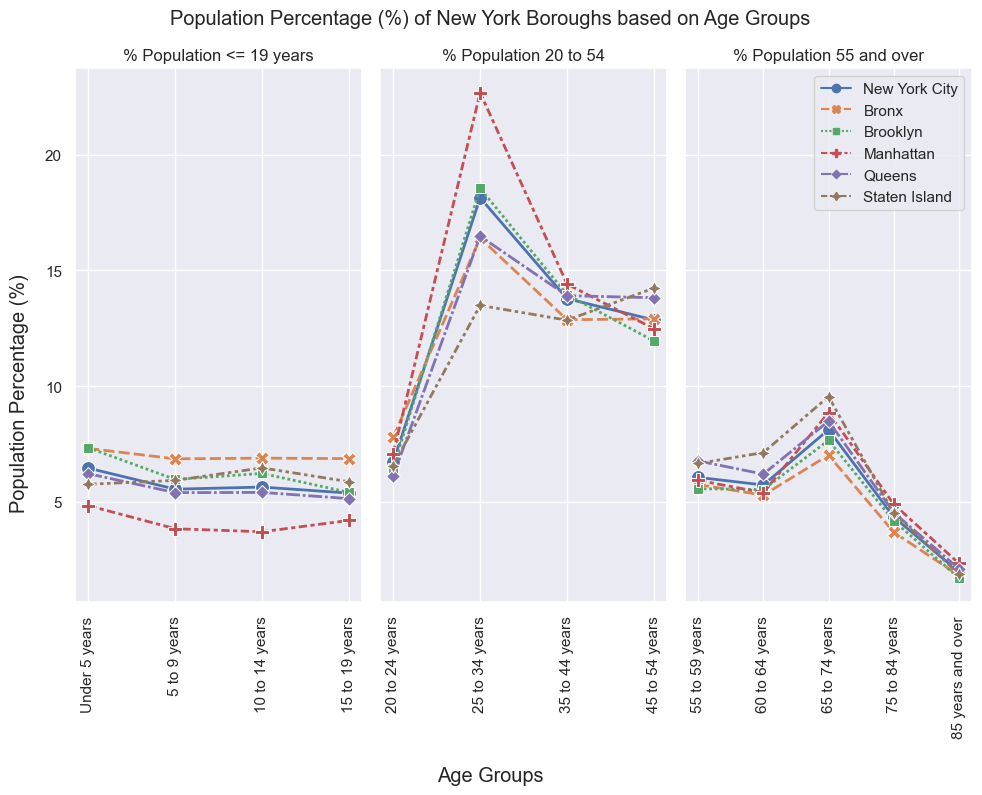

In [8]:
b13()

### B2.1 Loading commuter data (5 marks)
Data on how the residents of the five boroughs (Workers 16 years and over) commute to work was extracted from the ACS economic dataset and loaded into the excel spreadsheet:  `commuting.xlsx` 

For the `b21_load()` function below: 
- Load the Commuting excel spreadsheet `commuting.xlsx` into a DataFrame.
- Your DataFrame's row and column indexes should match those in the excel spreadsheet.
- The code cell provided below function b3_load() - shown below - should return the value `4072761`.
  - Which is the the number of `Workers 16 years and over` in New York City.

`b21= b21_load()
 b21['New York City','Estimate'][0]`

In [9]:
def b21_load():
    
    # Load the file using pd.read_excel, removing headers and skipping the first two rows, THEN select only wanted columns
    # This is done so that only the values of the data are retained, and then new column+row indexes are introduced
    data2 = pd.read_excel('a2data/commuting.xlsx', header=None, skiprows=2, usecols=range(1,25))
    
    # Set new row and column indexes as follows
    index_names2 = ['Workers 16 years and over', 'Car, truck, or van - drove alone', 'Car, truck, or van - carpooled', 'Public transportation (excluding taxicab)', 'Walked', 'Other means', 'Worked at home']
    
    # Using MultiIndex.from_product to quickly build multi-dimensional column indexes
    column_names2 = pd.MultiIndex.from_product([['New York City', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],['Estimate', 'Margin of Error', 'Percent', 'Percent Margin of Error']],
                                              names=['Borough','Type'])
    
    # Load the data (only values), and set rows and columns
    df2 = pd.DataFrame(data2.values, index=index_names2, columns=column_names2)
    
    # Convert the 'Estimate' columns for all Boroughs into integers, using for loop
    for column_name3 in df2.columns:
        if 'Estimate' in column_name3:
            df2[column_name3] = df2[column_name3].str.replace(',', '').astype(int)
    
    return df2
    pass

In [10]:
b21 = b21_load()
b21['New York City','Estimate'][0]

4072761

In [11]:
b21

Borough                                   New York City                  \
Type                                           Estimate Margin of Error   
Workers 16 years and over                       4072761       +/-21,353   
Car, truck, or van - drove alone                 909776       +/-17,042   
Car, truck, or van - carpooled                   186153        +/-7,365   
Public transportation (excluding taxicab)       2272028       +/-21,937   
Walked                                           411388       +/-13,299   
Other means                                      120112        +/-7,159   
Worked at home                                   173304        +/-6,987   

Borough                                                                       \
Type                                         Percent Percent Margin of Error   
Workers 16 years and over                  4,072,761                     (X)   
Car, truck, or van - drove alone               22.3%                  +/-0.4   
Car, truck, or van - carpooled                  4.6%                  +/-0.2   
Public transportation (excluding taxicab)      55.8%                  +/-0.5   
Walked                                         10.1%                  +/-0.3   
Other means                                     2.9%                  +/-0.2   
Worked at home                                  4.3%                  +/-0.2   

Borough                                      Bronx                           \
Type                                      Estimate Margin of Error  Percent   
Workers 16 years and over                   593642       +/-11,105  593,642   
Car, truck, or van - drove alone            141947        +/-7,459    23.9%   
Car, truck, or van - carpooled               24871        +/-3,168     4.2%   
Public transportation (excluding taxicab)   355222        +/-9,955    59.8%   
Walked                                       43163        +/-4,924     7.3%   
Other means                                  11735        +/-1,861     2.0%   
Worked at home                               16704        +/-2,403     2.8%   

Borough                                                           Brooklyn  \
Type                                      Percent Margin of Error Estimate   
Workers 16 years and over                                     (X)  1221412   
Car, truck, or van - drove alone                           +/-1.2   227254   
Car, truck, or van - carpooled                             +/-0.5    50012   
Public transportation (excluding taxicab)                  +/-1.4   745609   
Walked                                                     +/-0.8   105572   
Other means                                                +/-0.3    37325   
Worked at home                                             +/-0.4    55640   

Borough                                                    ... Manhattan  \
Type                                      Margin of Error  ...   Percent   
Workers 16 years and over                       +/-11,035  ...   906,005   
Car, truck, or van - drove alone                 +/-7,277  ...      6.5%   
Car, truck, or van - carpooled                   +/-3,584  ...      2.2%   
Public transportation (excluding taxicab)       +/-11,632  ...     58.7%   
Walked                                           +/-5,471  ...     20.1%   
Other means                                      +/-3,231  ...      5.5%   
Worked at home                                   +/-3,684  ...      7.0%   

Borough                                                             Queens  \
Type                                      Percent Margin of Error Estimate   
Workers 16 years and over                                     (X)  1135110   
Car, truck, or van - drove alone                           +/-0.5   362638   
Car, truck, or van - carpooled                             +/-0.4    71624   
Public transportation (excluding taxicab)                  +/-1.2   576474   
Walked                             

### B2.2 Commuting to work (16 marks)
The ACS economic dataset provides information on how the residents of the five boroughs (Workers 16 years and over) commute to work.

Create a line chart which shows the percentage of the population for each borough and their means of commuting. Your plot should also include NYC as a sixth 'borough' for comparison.  You may find Figure 5.17 from the Truthful Art helpful.  This plot was discussed in the TA-5 notebook.

Your `b22()` function should:
- call the `b21_load()` function to retrieve the Commuter Data Frame  
- extract commuter data for each type of commuting for each borough 
- create a plot similar to Figure 5.17
  - different coloured lines for each commuting category 
  - appropriate labels and legend

In [12]:
def b22():
    
    # Call on the previous function for future use
    b21 = b21_load()
    
    # Create a list of 'Estimates' for each Borough
    NYC_estimate1 = b21['New York City','Estimate']
    Bronx_estimate1 = b21['Bronx','Estimate']
    Brooklyn_estimate1 = b21['Brooklyn','Estimate']
    Manhattan_estimate1 = b21['Manhattan','Estimate']
    Queens_estimate1 = b21['Queens','Estimate']
    Staten_Island_estimate1 = b21['Staten Island','Estimate']
    
    # Create a new DataFrame that only includes the index and population percentages of each borough
    NYC_com_percent = round(NYC_estimate1 / b21['New York City','Estimate'][0] * 100, 2)
    Bronx_com_percent = round(Bronx_estimate1 / b21['Bronx','Estimate'][0] * 100, 2)
    Brooklyn_com_percent = round(Brooklyn_estimate1 / b21['Brooklyn','Estimate'][0] * 100, 2)
    Manhattan_com_percent = round(Manhattan_estimate1 / b21['Manhattan','Estimate'][0] * 100, 2)
    Queens_com_percent = round(Queens_estimate1 / b21['Queens','Estimate'][0] * 100, 2)
    Staten_Island_com_percent = round(Staten_Island_estimate1 / b21['Staten Island','Estimate'][0] * 100, 2)
    
    # Create new DataFrames for required selection of data
    data2 = pd.DataFrame(
    {'New York City':NYC_com_percent,
    'Bronx':Bronx_com_percent,
    'Brooklyn':Brooklyn_com_percent,
    'Manhattan':Manhattan_com_percent,
    'Queens':Queens_com_percent,
    'Staten Island':Staten_Island_com_percent})
    
    # Transpose data (rows < -- > columns) to obtain desired graph from plots
    data_transposed = data2.transpose()
    cols = [1,2,3,4]
    data_com = data_transposed[data_transposed.columns[cols]]
    
    # Set new name for the graph's legend
    data_commute = data_com.set_axis(['Drove alone', 'Carpool', 'Public transport', 'Walked'], axis=1)
    
    # Just for fun - use different grids to see what's best for different graph
    # print(plt.style.available)
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Using subplots, however, only for 1 graph
    fig, ax = plt.subplots(1, 1)
    
    # Set styles of graph including width of line, size of markers, etc.
    ax = sns.lineplot(data=data_commute, linewidth=2, markers=True, markersize=10)
    ax.set(xlabel='Boroughs of NYC', ylabel='% Working population (workers >= 16 years)')
    ax.legend(fontsize=8, loc='center left')
    
    # Set title
    plt.title('Types of commuting within NYC Boroughs')
    
    plt.show()
    
    return
    pass 

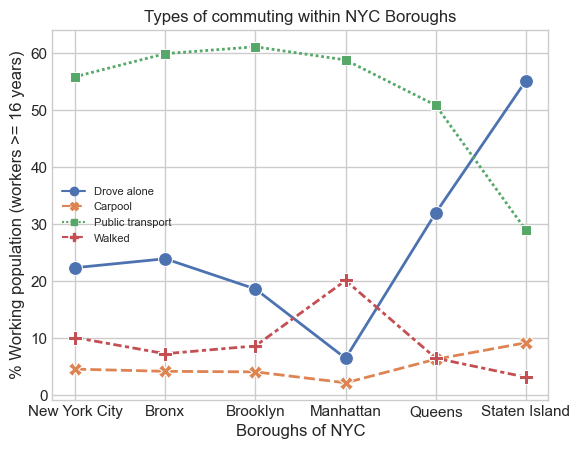

In [13]:
b22()

## B3: Birthdays [23 total marks]
For this problem we will be analysing and visualising two big countries' birth data as an homage to Matt Stiles's ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/) article.  Our chart will use the  birth data provided in A2 data folder: `BigCountryX_births_2000-2012.csv`, `BigCountryY_births_2005-2014.csv`.


Both files have the following structure:

| year |	month |	date_of_month |	day_of_week	 | births |
|:---|:---|:---|:---|:---|
| 2000 |	1 |	1 |	6 |	8096 |
 |2000 |	1 |	2 |	7 |	7772 |
 |2000 |	1 |	3 |	1 |	10142 |
 |2000 |	1 |	4 |	2 |	11248 |


## B31 Load data [7 marks]
Complete the `b31()` function below which should provide the following functionality:
- Load data from the two files into one Data Frame and clean as required.
- Return a Data Frame with multiple indexes for `month` and `date_of_month` and a `births` column which has the average daily births from 2000-2014. You are required to average the daily births of the two big countries (Country X, Country Y). See `b31().tail()` output below. *Hint: Review the PyDSHB notebook: *03.05 Hierarchical Indexing*.

<img src="a2fig/b21.JPG" width=221 height=199 align=left />

In [14]:
def b31():
    
    # Load the two birth data from both countries
    country_X = pd.read_csv('a2data/BigCountryX_births_2000-2012.csv')
    country_Y = pd.read_csv('a2data/BigCountryY_births_2005-2014.csv')
    
    # Merge both dataframes by doing OUTER JOIN, on 'year', 'month' and 'date_of_month', suffixes to ensure they are still different
    merged1_XY = country_X.merge(country_Y, on=['year','month','date_of_month'], how='outer', suffixes=('_X', '_Y'))
    
    # This would have some data with _X births values or _Y births values (NaN values are shown for those that have only one value)
    # Technically, only data from 2005 to 2012 have both values of _X and _Y births
    
    # Extract the mean values of 2005 to 2012 from births_X and births_Y as a column
    # Data with NaN are not affected! I love this function! Data from 2000-2004 and 2013-2014 are still intact
    mean_values = merged1_XY[['births_X', 'births_Y']].mean(axis=1)
    
    # Join the mean_values column into existing dataframe
    merged1_XY['births'] = mean_values
    
    # Now use .groupby() and .mean() to extract values based on month and date_of_month
    average_births_day = merged1_XY.groupby(['month', 'date_of_month'])['births'].mean()
    
    # Then create a new dataframe based on the previous result:
    average_births = pd.DataFrame(average_births_day)
    
    return average_births
    
    pass

In [15]:
b31 = b31()
b31.tail()

# I am not quite sure why my results differ from the intended results
# Could you please let me know what I did wrong after you've marked my work?
# Thank you!

births
month date_of_month              
12    27             12160.000000
      28             11484.866667
      29             11577.433333
      30             11688.066667
      31             10537.633333

### B3.2 Plot data [16 marks]
Create a heatmap style plot to show the average daily births per month/day, as shown in the picture below.

Additional criteria and information:
 - Use `b31()` function to load data 
 - You are not allowed to directly apply the bulit-in function `seaborn.heatmap()` 
 - The birth data were provided with different years for Country X and Country. This should not affect your calculation of average daily births. For any month/day, for example, 1st December, you just need to average on all the #birth on 1st December, across all the years for both Country X and Country Y. 
 - Figure size: 16 by 6
 - Add appropriate labels. 
   - X-axis labels should be on the top of the plot.
 - For the color bar select the appropriate discrete values and color limits. Indicate out-of-bounds values with a triangular arrow.
    - Do not need to duplicate article's color map or colorbar placement. 
 - You may find the following recources useful:
    - Matt Stiles's article: ["How Common is Your Birthday"](http://thedailyviz.com/2016/09/17/how-common-is-your-birthday-dailyviz/).
    - [Creating annotated heatmaps](https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) 
    - PyDSHB: 04.07 Customizing Colorbars (from course material)

<img src="a2fig/b22.JPG" width=738 height=343 align=left/> <br>

In [16]:
def b32():
    
    # Call on the function b31 form previous section
    b31
    
    # To change the Month number to names (to make the DataFrame look nicer):
    # This may not need to be done, but I researched ways to change a MultiIndex index values, so why not?
    month_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'}
    
    # Change only index.level[0] --> that is the 'month' --> to Jan, Feb, Mar, etc.
    b31.index = b31.index.rename(names=['month', 'date_of_month']).set_levels(
    b31.index.levels[0].map(month_dict), level=0)
    
    # To create heatmap, we need normal, non-multiindexed DataFrame, so unstack levels
    heatmap = b31.unstack(level='date_of_month')
    
    # Create a figure with proper size
    fig, ax = plt.subplots(figsize=(16,6))
    
    # Set colours, boundaries useful for colorbar, and extend='both' for arrows
    cmap = mpl.cm.Blues
    bounds = [9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    
    # Again, set colour for the heatmap (same colour)
    # I changed the labels for xticks here because the xticks starts from 0. It must start on 1 all the way up to 31
    plt.imshow(heatmap, cmap='Blues')
    labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
    plt.xticks(range(len(heatmap.columns)), labels)
    plt.yticks(range(len(heatmap.index)), heatmap.index)
    
    # Colorbar (horizontal) using the set colours above, and shrink the size down
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                 orientation="horizontal", shrink=0.5)
    
    # Plot labels
    plt.xlabel('Date of Month')
    plt.ylabel('Month')
    plt.title('Average Births')
    
    return plt.show()

    pass


C:\Users\stanleytjandra.DESKTOP-OOIPU77\AppData\Local\Temp\ipykernel_61308\3305734754.py:45: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),


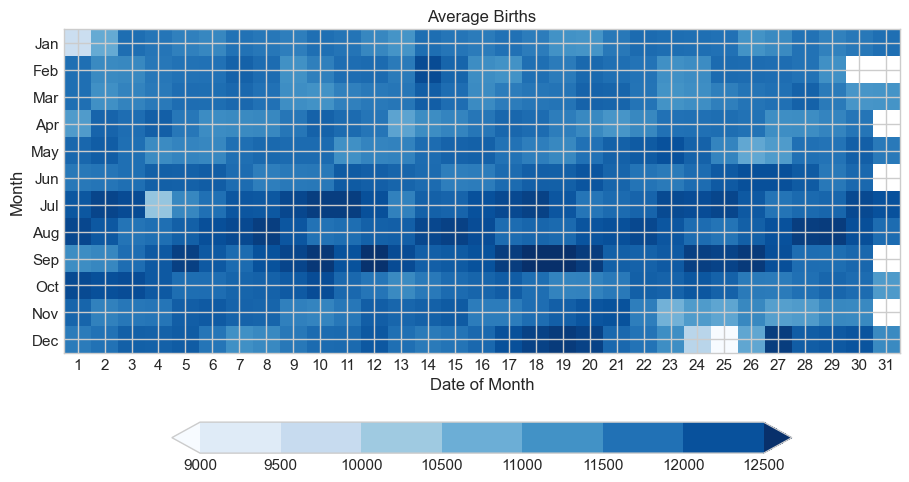

In [17]:
b32()

In [18]:
# I am also not sure how to go around the Deprecation Warning above.
# Please let me know when you've marked this. Thank you.